In [34]:
#Here we install the nltk package onto the Try Jupyter environment. This needs to be run every time you load in the code.
import sys
!{sys.executable} -m pip install nltk
!{sys.executable} -m pip install matplotlib

import string
import pandas as pd 
import nltk #This is a bit redundant, but necessary for the Try Jupyter environment.
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.pyplot import figure
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem.wordnet import WordNetLemmatizer
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('punkt')

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

### Load File

In [35]:
filename = 'Lincoln.txt'

try:
    file = open(filename)
except:
    print('File cannot be opened: ', filename)

### Tokenization

In [36]:
files = open('Kennedy.txt')
tokens = files.read()
tokens = nltk.word_tokenize(tokens)
print (tokens)

['Mr.', 'Vice', 'President', ',', 'Mr.', 'Speaker', ',', 'Members', 'of', 'the', '88th', 'Congress', ':', 'I', 'congratulate', 'you', 'all', '--', 'not', 'merely', 'on', 'your', 'electoral', 'victory', 'but', 'on', 'your', 'selected', 'role', 'in', 'history', '.', 'For', 'you', 'and', 'I', 'are', 'privileged', 'to', 'serve', 'the', 'great', 'Republic', 'in', 'what', 'could', 'be', 'the', 'most', 'decisive', 'decade', 'in', 'its', 'long', 'history', '.', 'The', 'choices', 'we', 'make', ',', 'for', 'good', 'or', 'ill', ',', 'may', 'well', 'shape', 'the', 'state', 'of', 'the', 'Union', 'for', 'generations', 'yet', 'to', 'come', '.', 'Little', 'more', 'than', '100', 'weeks', 'ago', 'I', 'assumed', 'the', 'office', 'of', 'President', 'of', 'the', 'United', 'States', '.', 'In', 'seeking', 'the', 'help', 'of', 'the', 'Congress', 'and', 'our', 'countrymen', ',', 'I', 'pledged', 'no', 'easy', 'answers', '.', 'I', 'pledged', '--', 'and', 'asked', '--', 'only', 'toil', 'and', 'dedication', '.', '

### Stemming

In [37]:
ps=PorterStemmer()

stemmed_words=[]
for w in tokens:
    stemmed_words.append(ps.stem(w))
print(stemmed_words)

['mr.', 'vice', 'presid', ',', 'mr.', 'speaker', ',', 'member', 'of', 'the', '88th', 'congress', ':', 'i', 'congratul', 'you', 'all', '--', 'not', 'mere', 'on', 'your', 'elector', 'victori', 'but', 'on', 'your', 'select', 'role', 'in', 'histori', '.', 'for', 'you', 'and', 'i', 'are', 'privileg', 'to', 'serv', 'the', 'great', 'republ', 'in', 'what', 'could', 'be', 'the', 'most', 'decis', 'decad', 'in', 'it', 'long', 'histori', '.', 'the', 'choic', 'we', 'make', ',', 'for', 'good', 'or', 'ill', ',', 'may', 'well', 'shape', 'the', 'state', 'of', 'the', 'union', 'for', 'gener', 'yet', 'to', 'come', '.', 'littl', 'more', 'than', '100', 'week', 'ago', 'i', 'assum', 'the', 'offic', 'of', 'presid', 'of', 'the', 'unit', 'state', '.', 'in', 'seek', 'the', 'help', 'of', 'the', 'congress', 'and', 'our', 'countrymen', ',', 'i', 'pledg', 'no', 'easi', 'answer', '.', 'i', 'pledg', '--', 'and', 'ask', '--', 'onli', 'toil', 'and', 'dedic', '.', 'these', 'the', 'congress', 'and', 'the', 'peopl', 'have',

### Declare Lemmatizer and Stop Word

In [38]:
#Here we load in the stopwords from the downloaded nltk stopwords list.
lmtzr = WordNetLemmatizer()
stop = stopwords.words('english')
stop.append("u")
stop.append("president")
stop.append("vice")
stop.append("first")
stop.append("lady")
stop.append("mr.")
stop.append("would")
stop.append("  ")
stop.append("  ")
stop.append(" u ")


In [39]:
#TODO: FILL IN THE FOLLOWING FUNCTIONS
def sort_and_reverse(lst):
    '''Given some list, we want to first sort it and then reverse it after. Here the order is important!
    The code should be only one or two lines given the following two list functions:
    https://www.w3schools.com/python/ref_list_sort.asp
    https://www.programiz.com/python-programming/methods/list/reverse
   
    NOTE: These functions do not actually return another list, they instead modify the list being passed into our argument.
    So we do not need to return anything for this function'''
    
    #SOLUTION GOES HERE
    lst.sort()
    lst.reverse()

            
            

### Declare Graph

In [40]:
#This function graphs the words we choose onto a bar graph and adjusts the labels.
def graph_words(wordlist, N):
    words=[]
    counts=[]
    for x, word in wordlist[:N]:
        words.append(word)
        counts.append(x)
    fig, ax = plt.subplots()
    ax.bar(words, counts)
    fig.autofmt_xdate()
    width = 10   ### adjust Height
    height = 8
    fig.set_size_inches(width, height)
    plt.show()

In [41]:
#Takes in the file, stopwords list, and number of important words and returns the most frequent words.
def most_frequent_words(file, stop, N):  
    #Here we create a dictionary, which we will assign a value to each word corresponding to the number of times this word appears.
    counts = dict()

    for line in file:
        line = line.rstrip()
        line = line.translate(line.maketrans('', '', string.punctuation))
        line = line.lower()
        words = line.split()

        #Now processes the words list, and removes the stop words.
        for word in words:
            if word.lower() not in stop:
                #Lemmatizing- we group similar word inflections together (e.g. rock and rocks becomes the same word)
                word=lmtzr.lemmatize(word)
                if word not in counts:
                    counts[word] = 1
                else:
                    counts[word] += 1

    #Puts the dictionary of counts into a list.
    word_list = [(counts[w], w) for w in counts]
    
    #THIS IS WHERE WE CALL THE FUNCTION YOU WROTE. Sort and reverse the list.
    sort_and_reverse(word_list)
    
    #Prints the table of most frequent words
    print("The " + str(N) + " most frequent words are")
    print("Rank\tCount\tWord")
    i = 1
    for x, word in word_list[:N]:
        print('%2s\t%4s\t%s' %(i, x, word))
        i += 1
    #Plot the words.
    graph_words(word_list, N)
    return word_list

The 30 most frequent words are
Rank	Count	Word
 1	  36	state
 2	  29	congress
 3	  25	government
 4	  24	upon
 5	  21	one
 6	  21	labor
 7	  20	union
 8	  20	country
 9	  19	court
10	  18	general
11	  17	people
12	  16	capital
13	  14	year
14	  14	power
15	  14	nation
16	  14	law
17	  13	may
18	  13	insurgent
19	  12	right
20	  12	person
21	  11	time
22	  11	territory
23	  11	present
24	  11	great
25	  11	circuit
26	  10	shall
27	  10	secretary
28	  10	number
29	  10	men
30	  10	made


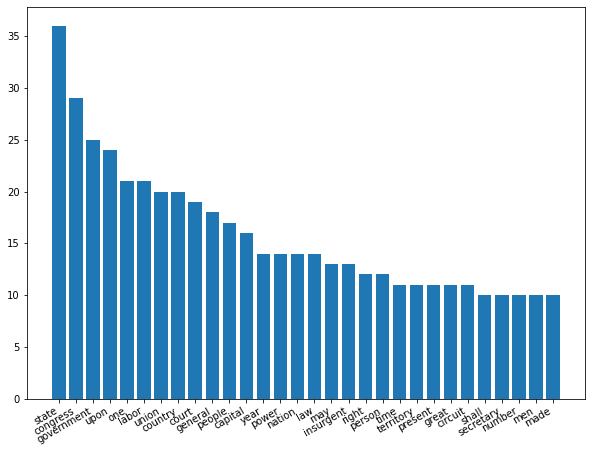

In [42]:
#This fuction currently returns just the top 10 word. 
#You can fix the arguments you pass in to change the number of words this returns.
words = most_frequent_words(file, stop, 30)

In [43]:
words

[(36, 'state'),
 (29, 'congress'),
 (25, 'government'),
 (24, 'upon'),
 (21, 'one'),
 (21, 'labor'),
 (20, 'union'),
 (20, 'country'),
 (19, 'court'),
 (18, 'general'),
 (17, 'people'),
 (16, 'capital'),
 (14, 'year'),
 (14, 'power'),
 (14, 'nation'),
 (14, 'law'),
 (13, 'may'),
 (13, 'insurgent'),
 (12, 'right'),
 (12, 'person'),
 (11, 'time'),
 (11, 'territory'),
 (11, 'present'),
 (11, 'great'),
 (11, 'circuit'),
 (10, 'shall'),
 (10, 'secretary'),
 (10, 'number'),
 (10, 'men'),
 (10, 'made'),
 (10, 'large'),
 (10, 'army'),
 (10, 'also'),
 (10, 'act'),
 (9, 'whole'),
 (9, 'well'),
 (9, 'united'),
 (9, 'supreme'),
 (9, 'subject'),
 (9, 'recommend'),
 (9, 'public'),
 (9, 'part'),
 (9, 'many'),
 (9, 'judge'),
 (9, 'insurrection'),
 (9, 'foreign'),
 (9, 'condition'),
 (9, 'claim'),
 (9, 'citizen'),
 (9, 'attention'),
 (9, 'already'),
 (8, 'war'),
 (8, 'vessel'),
 (8, 'thus'),
 (8, 'since'),
 (8, 'new'),
 (8, 'mean'),
 (8, 'last'),
 (8, 'laborer'),
 (8, 'justice'),
 (8, 'however'),
 (8, 

In [63]:
#convert words list to dataframe
df = pd.DataFrame(words)

In [65]:
#renameing columns
df.rename(columns={df.columns[0]: 'Count', df.columns[1]: 'Word'},inplace=True)

In [69]:
#setting rank column
df['Rank'] = df.index

In [71]:
#reorder columns
df = df[['Rank', 'Count', 'Word']]

In [75]:
#convert to csv
df.to_csv('speech_word_ranks.csv', encoding='utf-8', index=False)